In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load data
sales = pd.read_csv('../data/raw/sales_train_validation.csv')
calendar = pd.read_csv('../data/raw/calendar.csv')
prices = pd.read_csv('../data/raw/sell_prices.csv')

# Quick checks
print("Sales shape:", sales.shape)
print("Calendar shape:", calendar.shape)
print("Prices shape:", prices.shape)

sales.head()


Sales shape: (30490, 1919)
Calendar shape: (1969, 14)
Prices shape: (6841121, 4)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [14]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB


<Axes: title={'center': 'Sample Item Sales Over Time'}>

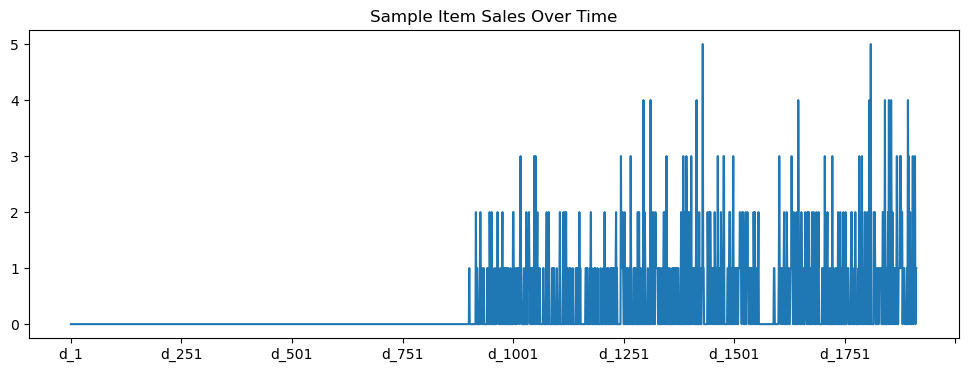

In [15]:
sample_item = sales.iloc[0, 6:]  # Skip id, item_id, dept_id, cat_id, store_id, state_id
sample_item.T.plot(figsize=(12, 4), title="Sample Item Sales Over Time")

Text(0.5, 1.0, 'Event Distribution Over Time')

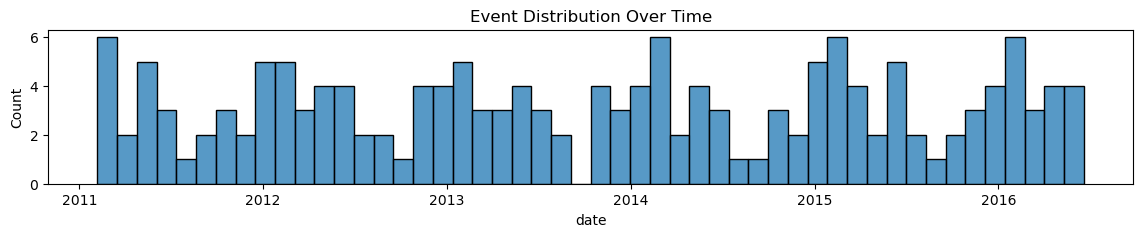

In [16]:
calendar.head()

# Convert date column to datetime
calendar['date'] = pd.to_datetime(calendar['date'])

# Plot events
event_days = calendar[calendar['event_name_1'].notnull()]
plt.figure(figsize=(14, 2))
sns.histplot(event_days['date'], bins=50)
plt.title("Event Distribution Over Time")


Text(0, 0.5, 'Price')

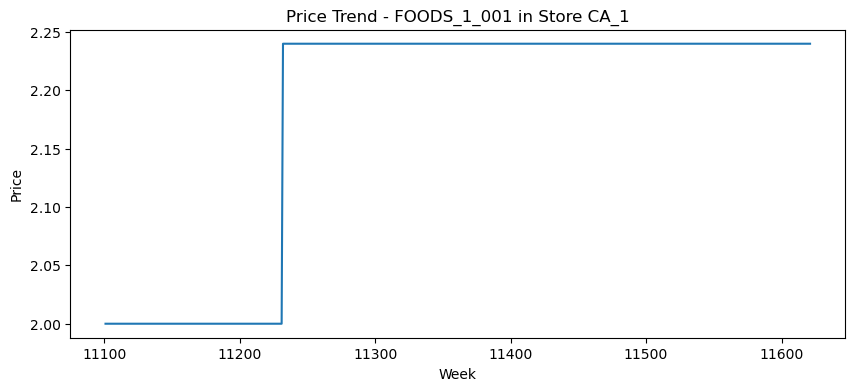

In [17]:
# Prices over time for a single item in one store
sample_price = prices[(prices['store_id'] == 'CA_1') & 
                      (prices['item_id'] == 'FOODS_1_001')]

plt.figure(figsize=(10, 4))
plt.plot(sample_price['wm_yr_wk'], sample_price['sell_price'])
plt.title("Price Trend - FOODS_1_001 in Store CA_1")
plt.xlabel("Week")
plt.ylabel("Price")


Text(0, 0.5, 'Units Sold')

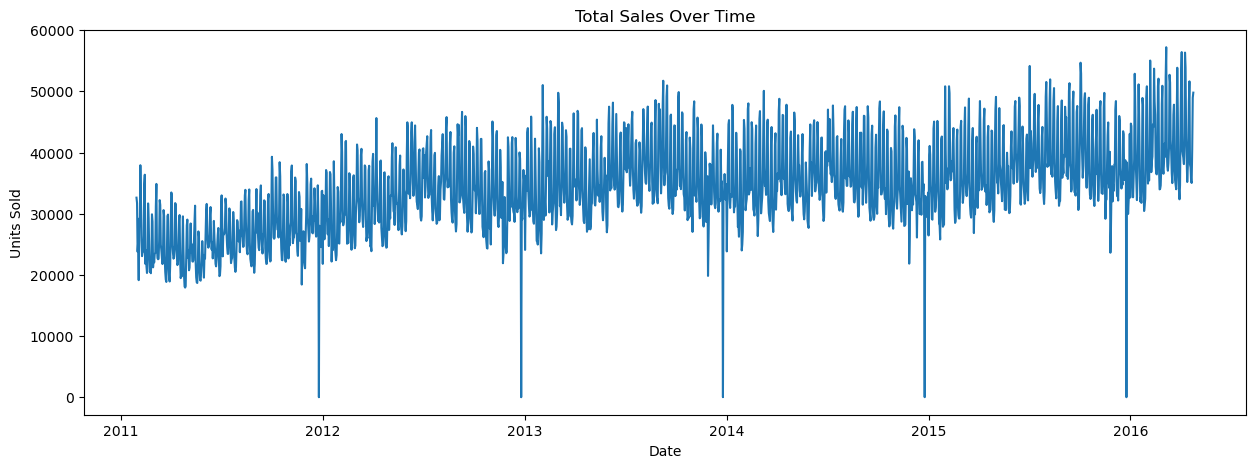

In [19]:
# Extract only sales data
sales_values = sales.iloc[:, 6:]  # All d_1 to d_1913

# Total sales across all items per day
total_sales = sales_values.sum(axis=0)

# Convert 'd_1', 'd_2', ... to dates using calendar
d_cols = sales_values.columns
date_map = dict(zip(calendar['d'], calendar['date']))
total_sales.index = total_sales.index.map(date_map)

# Plot
plt.figure(figsize=(15, 5))
plt.plot(total_sales)
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Units Sold")
